# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [85]:
fname_data_train    = 'C:/Users/heji0/OneDrive/문서/2021-1/머신러닝/10/assignment_10_data_train.csv'
fname_data_test     = 'C:/Users/heji0/OneDrive/문서/2021-1/머신러닝/10/assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

num_data1 = data_train.shape[0]
num_data2 = data_test.shape[0]

point_x1 = np.zeros(num_data1)
point_y1 = np.zeros(num_data1)
label1   = np.zeros(num_data1)

for i in range(num_data1):

    point_x1[i]  = data_train[i,0]
    point_y1[i]  = data_train[i,1]
    label1[i]    = data_train[i,2]
    
point_x2 = np.zeros(num_data2)
point_y2 = np.zeros(num_data2)
label2   = np.zeros(num_data2)

for i in range(num_data2):

    point_x2[i]  = data_test[i,0]
    point_y2[i]  = data_test[i,1]
    label2[i]    = data_test[i,2]

## plot the data

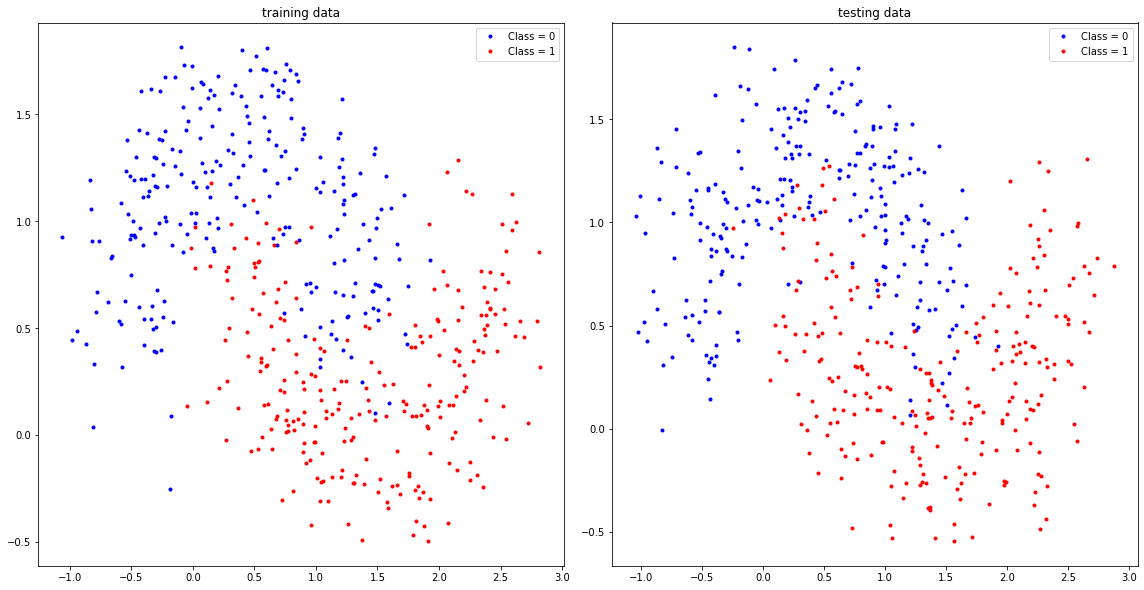

In [86]:
plt.figure(figsize=(16,16))
rx1 = []
ry1 = []
bx1 = []
by1 = []
for i in range(0, num_data1):
    if label1[i] == 0:
        bx1.append(point_x1[i])
        by1.append(point_y1[i])
    else:
        rx1.append(point_x1[i])
        ry1.append(point_y1[i])
plt.subplot(221)
plt.title('training data')
plt.plot(bx1, by1, 'o', color='blue', label = 'Class = 0', markersize = 3)
plt.plot(rx1, ry1, 'o', color='red', label = 'Class = 1', markersize = 3)  
plt.legend()
plt.tight_layout()
    
rx2 = []
ry2 = []
bx2 = []
by2 = []
for i in range(0, num_data2):
    if label2[i] == 0:
        bx2.append(point_x2[i])
        by2.append(point_y2[i])
    else:
        rx2.append(point_x2[i])
        ry2.append(point_y2[i])
plt.subplot(222) 
plt.title('testing data')
plt.plot(bx2, by2, 'o', color='blue', label = 'Class = 0', markersize = 3)
plt.plot(rx2, ry2, 'o', color='red', label = 'Class = 1', markersize = 3)        
    
plt.legend()
plt.tight_layout()

plt.show()

## define feature function

In [87]:
def feature_function(x, y):
    feature = np.array([1, x, y, x*y, x**2, y**2, x*x*y, x*y*y, x**3, y**3],dtype=object)
    return feature

## define regression function based on the feature function

In [88]:
def regression_function(theta, feature):
    value = np.matmul(np.transpose(theta), feature) 
    return value

## define regularization function on the model parameters

In [89]:
def regularization_function(theta):
    value = np.matmul(theta, theta) 
    return value

## define sigmoid function

In [90]:
def logistic_function(x):
    z = 1 / (1 + np.exp(-x))
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [91]:
def compute_loss_feature(theta, feature, label, alpha):
    f = regression_function(theta, feature)
    h = logistic_function(f)
    loss = (-label * np.log(h + np.finfo(float).eps) - (1 - label) * np.log(1 - h + np.finfo(float).eps)).mean() 
    loss = loss + (alpha // 2)*regularization_function(theta)
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [92]:
def compute_gradient_feature(theta, feature, label, alpha):
    f = regression_function(theta, feature)
    h = logistic_function(f)
    num_data = feature[1].shape[0]
    one = np.ones(num_data)
    X = np.column_stack([one,feature[1], feature[2], feature[3],feature[4],feature[5],feature[6], feature[7], feature[8], feature[9]])
    dev = np.dot(X.T,(h - label))
    gradient = dev / num_data
    return gradient

## compute the accuracy

In [93]:
def compute_accuracy(theta, feature, label):
    num_data = feature[1].shape[0]
    accuracy = 0
    rf = regression_function(theta, feature)
    for i in range(num_data):
        if(rf[i] >= 0):
            l = 1
        else:
            l = 0
        if(l == label[i]):
            accuracy = accuracy + 1
    accuracy = accuracy / num_data
    return accuracy

## gradient descent for the model parameters $\theta$

In [94]:
num_iteration   = 30000    
learning_rate   = 0.3
alpha           = 0.001
theta          = np.array((0, 0, 0, 0, 0, 0, 0, 0, 0, 0))

In [95]:
theta_iteration             = np.zeros((num_iteration, theta.size))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [96]:
for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient_feature(theta, feature_function(point_x1, point_y1), label1, alpha)
    loss1 = compute_loss_feature(theta, feature_function(point_x1, point_y1), label1, alpha)
    theta_iteration[i] = theta
    loss_iteration_train[i] = loss1
    
    loss2 = compute_loss_feature(theta, feature_function(point_x2, point_y2), label2, alpha)
    loss_iteration_test[i] = loss2
    
    accuracy_iteration_train[i] = compute_accuracy(theta, feature_function(point_x1, point_y1), label1)
    accuracy_iteration_test[i] = compute_accuracy(theta, feature_function(point_x2, point_y2), label2)

    print("iteration1 = %4d, loss_train = %5.5f, loss_test = %5.5f, acctrain = %5.5f, acctest = %5.5f" % (i, loss1, loss2, accuracy_iteration_train[i], accuracy_iteration_test[i]))
    
theta_optimal = theta

iteration1 =    0, loss_train = 0.53268, loss_test = 0.53291, acctrain = 0.79400, acctest = 0.78000
iteration1 =    1, loss_train = 0.45236, loss_test = 0.45814, acctrain = 0.80000, acctest = 0.80200
iteration1 =    2, loss_train = 0.42141, loss_test = 0.42967, acctrain = 0.81200, acctest = 0.81800
iteration1 =    3, loss_train = 0.40499, loss_test = 0.41458, acctrain = 0.82200, acctest = 0.82600
iteration1 =    4, loss_train = 0.39370, loss_test = 0.40421, acctrain = 0.83000, acctest = 0.82400
iteration1 =    5, loss_train = 0.38518, loss_test = 0.39641, acctrain = 0.83200, acctest = 0.82800
iteration1 =    6, loss_train = 0.37843, loss_test = 0.39030, acctrain = 0.83200, acctest = 0.83400
iteration1 =    7, loss_train = 0.37293, loss_test = 0.38536, acctrain = 0.83200, acctest = 0.83400
iteration1 =    8, loss_train = 0.36832, loss_test = 0.38128, acctrain = 0.83200, acctest = 0.83400
iteration1 =    9, loss_train = 0.36439, loss_test = 0.37783, acctrain = 0.83000, acctest = 0.83800


## compute accuracy of the classifiers

In [97]:
accuracy_train  = compute_accuracy(theta_optimal, feature_function(point_x1, point_y1), label1)
accuracy_test   = compute_accuracy(theta_optimal, feature_function(point_x2, point_y2), label2)

## plot the results

In [98]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   
    plt.title('loss')
    plt.plot(loss_iteration_train, '-', color='red', label = 'train')
    plt.plot(loss_iteration_test, '-', color='blue', label = 'test')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [99]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   
    plt.title('accuracy')
    plt.plot(accuracy_iteration_train, '-', color='red', label = 'train')
    plt.plot(accuracy_iteration_test, '-', color='blue', label = 'test')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [100]:
def plot_data(data_train, data_test):
    plt.figure(figsize=(16,16))
    rx1 = []
    ry1 = []
    bx1 = []
    by1 = []
    for i in range(0, num_data1):
        if label1[i] == 0:
            bx1.append(point_x1[i])
            by1.append(point_y1[i])
        else:
            rx1.append(point_x1[i])
            ry1.append(point_y1[i])
    plt.subplot(221)
    plt.title('training data')
    plt.plot(bx1, by1, 'o', color='blue', label = 'Class = 0', markersize = 3)
    plt.plot(rx1, ry1, 'o', color='red', label = 'Class = 1', markersize = 3)  
    plt.legend()
    plt.tight_layout()
    
    rx2 = []
    ry2 = []
    bx2 = []
    by2 = []
    for i in range(0, num_data2):
        if label2[i] == 0:
            bx2.append(point_x2[i])
            by2.append(point_y2[i])
        else:
            rx2.append(point_x2[i])
            ry2.append(point_y2[i])
    plt.subplot(222) 
    plt.title('testing data')
    plt.plot(bx2, by2, 'o', color='blue', label = 'Class = 0', markersize = 3)
    plt.plot(rx2, ry2, 'o', color='red', label = 'Class = 1', markersize = 3)        
    
    plt.legend()
    plt.tight_layout()

    plt.show()

In [101]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    theta_iterationT = theta_iteration.T
    plt.plot(theta_iterationT[0], '-', color='red', label = r'$\theta_0$')
    plt.plot(theta_iterationT[1], '-', color='green', label = r'$\theta_1$')
    plt.plot(theta_iterationT[2], '-', color='blue', label = r'$\theta_2$')
    plt.plot(theta_iterationT[3], '-', color='orange', label = r'$\theta_3$')
    plt.plot(theta_iterationT[4], '-', color='purple', label = r'$\theta_4$')
    plt.plot(theta_iterationT[5], '-', color='pink', label = r'$\theta_4$')    
    plt.plot(theta_iterationT[6], '-', color='brown', label = r'$\theta_4$')    
    plt.xlabel('iteration')
    plt.legend()
    plt.tight_layout()
    plt.show()

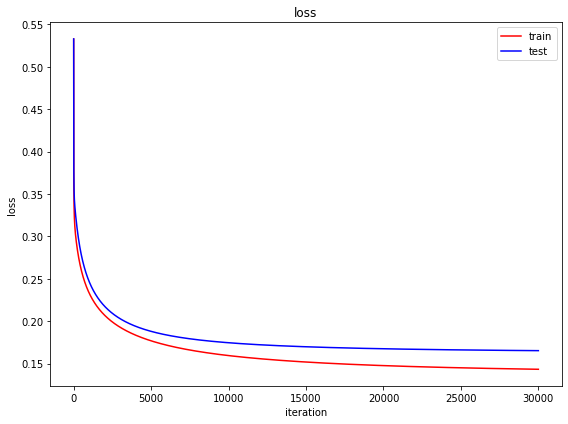

In [102]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

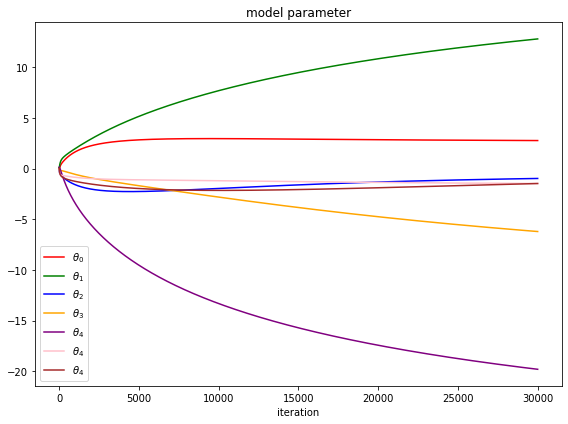

In [103]:
plot_model_parameter(theta_iteration)

In [104]:
def plot_classifier(data, theta):

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    num_data = data.shape[0]
    point_x = np.zeros(num_data)
    point_y = np.zeros(num_data)
    label   = np.zeros(num_data)
    
    for i in range(num_data):
        point_x[i]  = data[i,0]
        point_y[i]  = data[i,1]
        label[i]    = data[i,2]
    
    rx = []
    ry = []
    bx = []
    by = []
    for i in range(0, num_data):
        if label[i] == 0:
            bx.append(point_x[i])
            by.append(point_y[i])
        else:
            rx.append(point_x[i])
            ry.append(point_y[i])
    plt.plot(bx, by, 'o', color='blue', label = 'Class = 0', markersize = 3)
    plt.plot(rx, ry, 'o', color='red', label = 'Class = 1', markersize = 3)    
    
    X = np.arange(point_x.min()-0.1,point_x.max()+0.1,0.05)
    Y = np.arange(point_y.min()-0.1,point_y.max()+0.1,0.05)
    gX, gY = np.meshgrid(X, Y)
    Z = regression_function(theta, feature_function(gX, gY))
    
    plt.contourf(gX, gY, Z,levels = 100, cmap='bwr')
    plt.colorbar()
    plt.contour(gX, gY, Z, levels= [0], colors = 'black')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

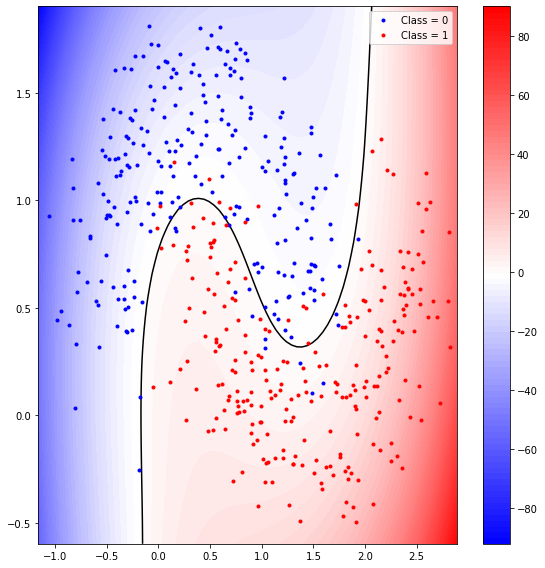

In [105]:
plot_classifier(data_train, theta_optimal)

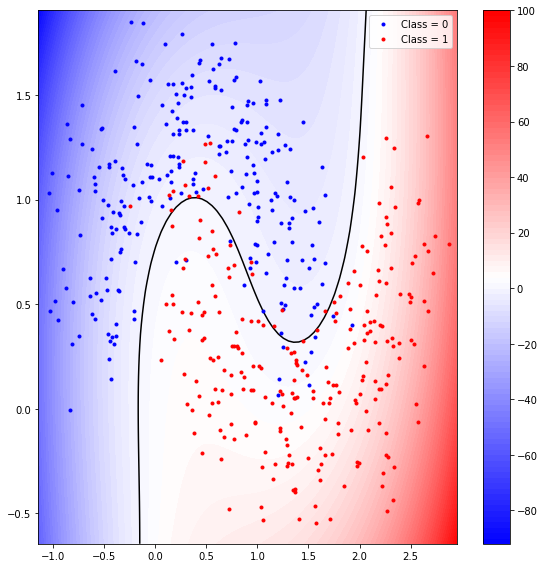

In [106]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

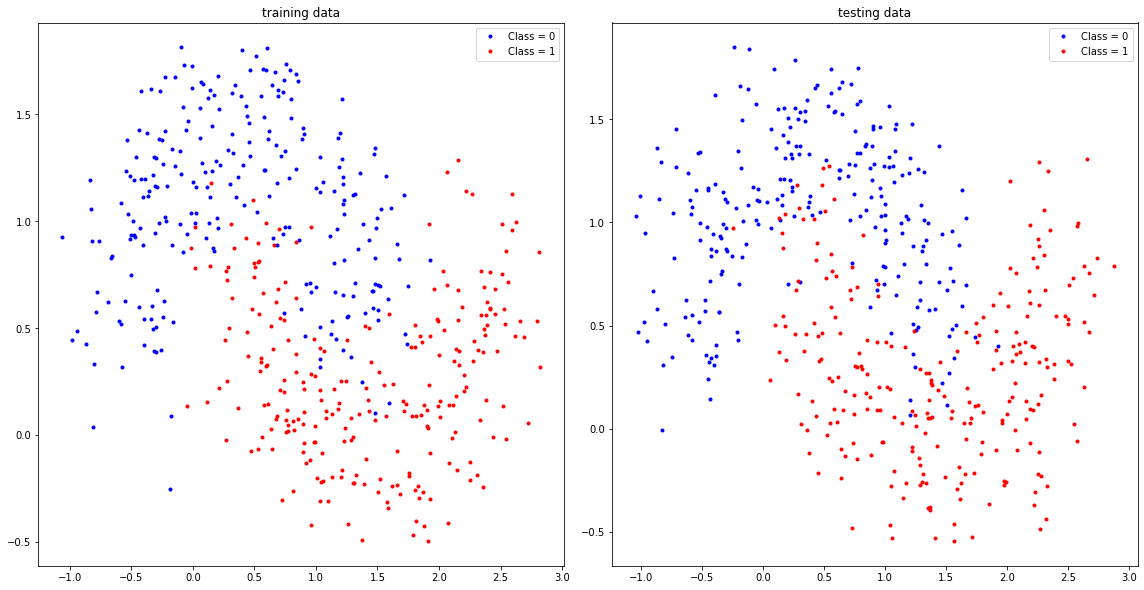

In [107]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

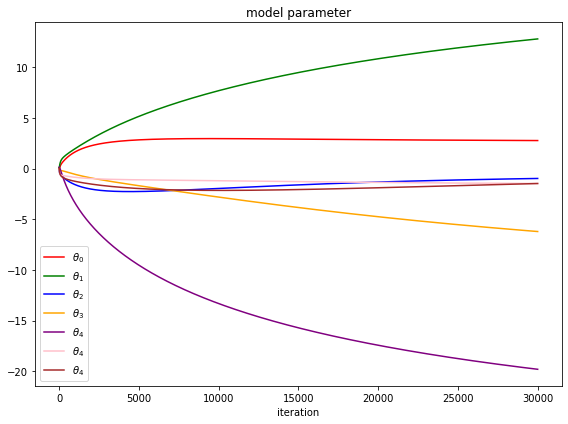

In [108]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

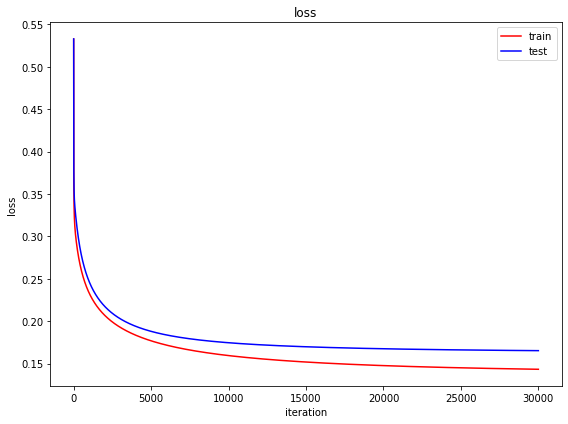

In [109]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

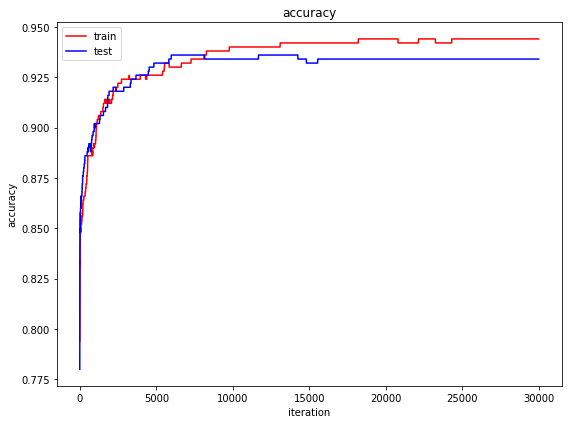

In [110]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

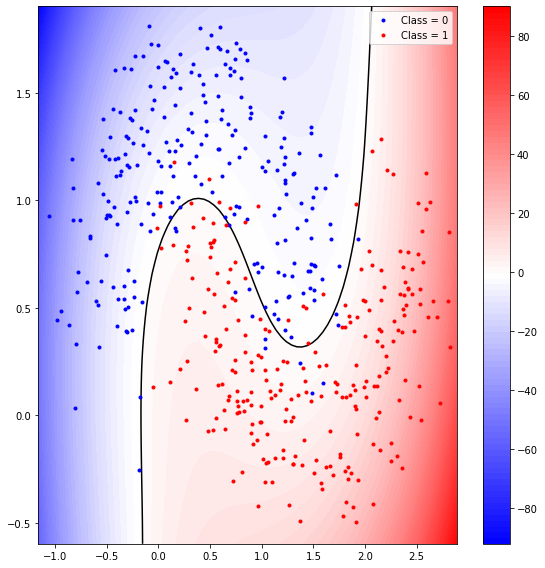

In [111]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

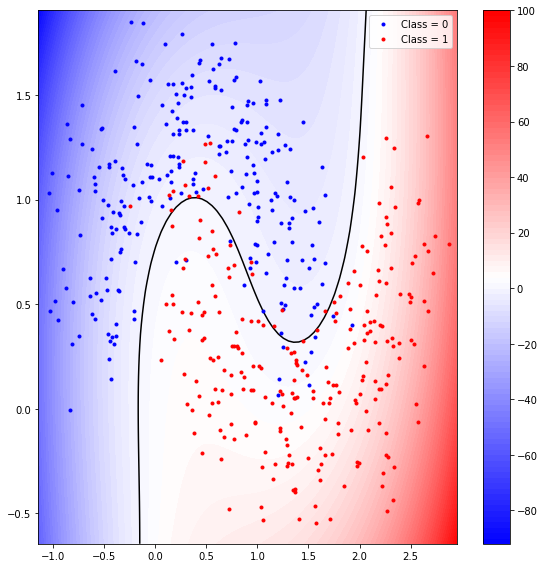

In [112]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [113]:
print('accuract(train): %5.5f' %(accuracy_train))
print('accuracy(test) : %5.5f' %(accuracy_test))

accuract(train): 0.94400
accuracy(test) : 0.93400
